<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Monte%20Carlo%20simulation/2023_summer_CCP/contributors/gahyun/Pi_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We estimate pi using Monte Carlo, i.e., random sampling.

![Unknown.png](attachment:Unknown.png)


Think about how to estimate pi from the figure above, which we would like to generate through the Python code.

Further, we would like to statistical analysis of the estimation of pi, i.e., how the estimate converges towards the true pi as shown below.

![Unknown-1.png](attachment:Unknown-1.png)

/Users/jeongminkim/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jeongminkim/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


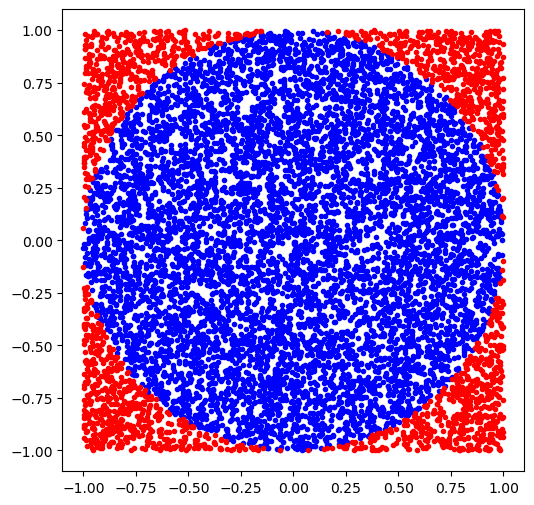

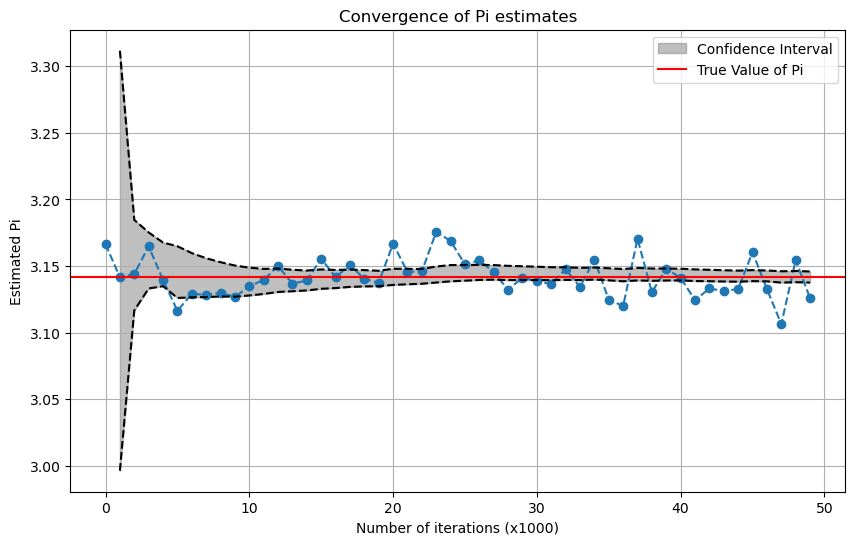

Final Estimated Pi: 3.1418
Final 95% Confidence Interval: (3.1376, 3.1459)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

class MonteCarloPi:
    def __init__(self, num_points):
        self.num_points = num_points

    def generate_points(self):
        """Generate random points within a square of length 2."""
        # EDIT!!!

    def inside_circle(self, points):
        """Check if the points are within the unit circle."""
        # EDIT!!!

    def estimate_pi(self):
        """Estimate the value of pi using Monte Carlo method."""
        points = self.generate_points()
        inside = self.inside_circle(points)
        pi_estimate = ### EDIT!!!
        return pi_estimate, points, inside

    def confidence_interval(self, estimates, confidence=0.95):
        """Compute the confidence interval for the estimates."""
        mean = np.mean(estimates)
        se = stats.sem(estimates)
        # Understand the below
        ci = se * stats.t.ppf((1 + confidence) / 2, len(estimates) - 1)
        return mean, mean - ci, mean + ci

    def plot_points(self, points, inside):
        """Plot points and the unit circle, color points inside the circle."""
        plt.figure(figsize=(6,6))
        # Understand the below
        plt.scatter(points[inside, 0], points[inside, 1], color='b', marker='.')
        plt.scatter(points[~inside, 0], points[~inside, 1], color='r', marker='.')
        plt.gca().set_aspect('equal')
        plt.show()

    def plot_convergence(self, pi_estimates, lower_bounds, upper_bounds):
        """Plot the convergence of pi estimates and confidence interval."""
        plt.figure(figsize=(10, 6))
        plt.plot(pi_estimates, marker='o', linestyle='dashed')
        plt.plot(lower_bounds, color='black', linestyle='--')
        plt.plot(upper_bounds, color='black', linestyle='--')
        plt.fill_between(range(len(lower_bounds)), lower_bounds, upper_bounds, color='gray', alpha=0.5, label='Confidence Interval')
        plt.axhline(np.pi, color='red', label='True Value of Pi')
        plt.xlabel('Number of iterations (x1000)')
        plt.ylabel('Estimated Pi')
        plt.title('Convergence of Pi estimates')
        plt.legend()
        plt.grid(True)
        plt.show()


    def run_simulation(self, num_iterations):
        """Run the Monte Carlo simulation and analyze the results."""
        pi_estimates = []
        lower_bounds = []
        upper_bounds = []

        for _ in range(num_iterations):
            pi_estimate, points, inside = self.estimate_pi()
            pi_estimates.append(pi_estimate)

            # Compute confidence interval after each estimate and store bounds
            mean, lower, upper = self.confidence_interval(pi_estimates)
            lower_bounds.append(lower)
            upper_bounds.append(upper)

        self.plot_points(points, inside)
        self.plot_convergence(pi_estimates, lower_bounds, upper_bounds)
        print(f"Final Estimated Pi: {mean:.4f}")
        print(f"Final 95% Confidence Interval: ({lower:.4f}, {upper:.4f})")

# Usage:
# Create an instance of the MonteCarloPi class
mc = MonteCarloPi(num_points=10000)
# Run the simulation
mc.run_simulation(num_iterations=50)
